In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('dataset.csv')
data.head()

,question,label
0,Är det lämpligt att gå med i ett välrenommerat...,0
1,Vilka städer nämner president Zelenskyj som nu...,1
2,Hur kan jag få en tjej att verkligen bli kär i...,0
3,"Vilka är möjliga orsaker till illamående, hals...",0
4,Vad hävdar Ryska försvarsdepartementet att de ...,1


In [19]:
# Divide the data into train and test
training_data, test_data = train_test_split(data, test_size = 0.2, random_state = 1)
print("training data: ", training_data.shape)
print("testing data: ", test_data.shape)

training data:  (6400, 2)
testing data:  (1600, 2)


In [20]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', SGDClassifier(random_state=1, max_iter=3000))
])

parameters = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],
    'vectorizer__binary': [False, True],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.05, 0.08, 0.1, 0.3, 0,5],
    'classifier__penalty': ['l2', 'l1', 'elasticnet'],
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
}

grid_search = GridSearchCV(pipeline, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(training_data['question'], training_data['label'])

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


/Users/johannordling/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/johannordling/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/johannordling/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/johannordling/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improv

Best score: 0.955
Best parameters set:
	classifier__alpha: 0.08
	classifier__loss: 'perceptron'
	classifier__penalty: 'l2'
	vectorizer: CountVectorizer(binary=True, ngram_range=(1, 2))
	vectorizer__binary: True
	vectorizer__ngram_range: (1, 2)


/Users/johannordling/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/johannordling/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/johannordling/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/johannordling/Library/Python/3.9/lib/python/site-packages/sklearn/linear_m

In [21]:
pipelineBestParams = sklearn.pipeline.Pipeline([
    ('vectorizer', sklearn.feature_extraction.text.TfidfVectorizer(binary=True, ngram_range=(1, 2))),
    ('classifier', sklearn.linear_model.SGDClassifier(random_state=1, max_iter=3000, alpha=0.08, loss = "perceptron", penalty = "l2"))
])

pipelineBestParams.fit(training_data['question'], training_data['label'])
predictions = pipelineBestParams.predict(test_data['question'])

              precision    recall  f1-score   support

           0    0.96981   0.95142   0.96053       844
           1    0.94689   0.96693   0.95681       756

    accuracy                        0.95875      1600
   macro avg    0.95835   0.95918   0.95867      1600
weighted avg    0.95898   0.95875   0.95877      1600



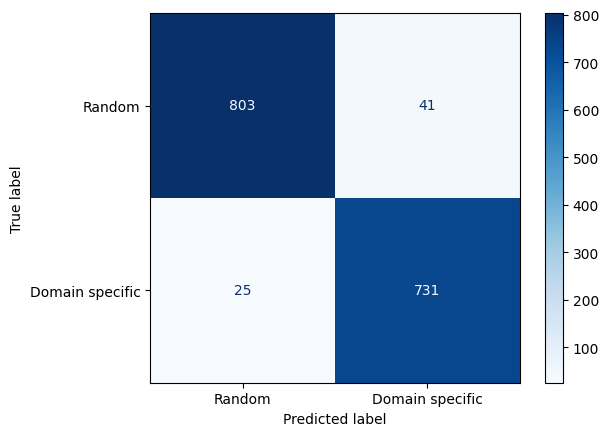

In [32]:
report = sklearn.metrics.classification_report(test_data['label'], predictions, digits=5)
print(report)

# Create and display a graphical confusion matrix
cm = confusion_matrix(test_data['label'], predictions)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Random', 'Domain specific'])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [51]:
# Show the questions that were misclassified
# Prevent truncation of text
pd.set_option('display.max_colwidth', None)
# Show more rows
pd.set_option('display.max_rows', 150)

test_data['prediction'] = predictions
test_data[test_data['label'] != test_data['prediction']]

,question,label,prediction
3228,"Löstes konflikten i Sudan som orsakade massakern i Darfur, etc. efter Sydsudans självständighet?",0,1
537,Varför tillåts slagsmål i ishockey?,0,1
644,Vad är Jakob Forssmeds kritik mot Internationella olympiska kommittén?,1,0
218,Vilken engelsk låt har enligt dig bäst texter?,0,1
2344,Varför fungerar ångkondensatorer under vakuum?,0,1
1682,Hur många människor befann sig på tågstationen vid attacken?,1,0
3706,Vad är några av parallellerna som Politico gör i en analys efter säkerhetskonferensen i München?,1,0
7434,Vad är målsättningen med arbetsgruppen för att stärka energisäkerheten?,1,0
7638,Varför uppstod ergonomi?,0,1
6577,"Omedelbar support @! 1800: ||: 2.5.1: ||: 49,1,9 för Avg Antivirus Tech Support telefonnummer?",0,1
